In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette(sns.color_palette('hls', 7))

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [85]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
Id = test.Id

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


So it looks like we have a lot of integers, a few floats, and a few objects

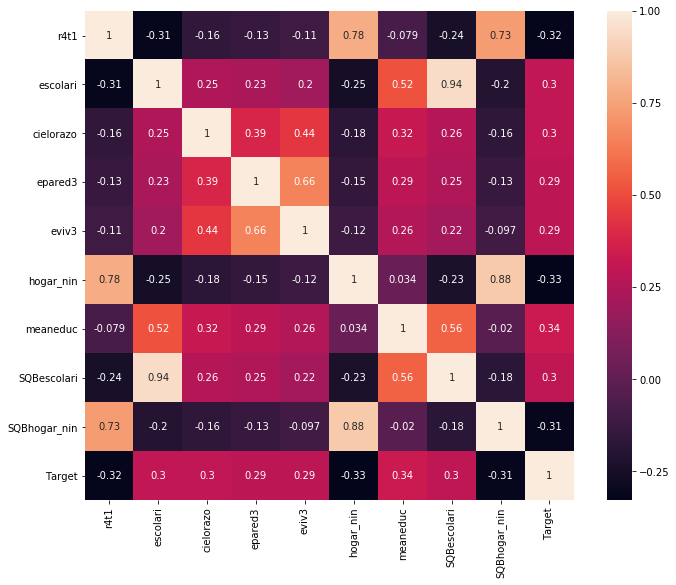

In [87]:
#Take a look at the variables that are most highly correlated with Poverty Score
corr_train = train.corr()
highest_corr = corr_train.index[abs(corr_train["Target"])>0.29]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train[highest_corr].corr(), square = True, annot = True)

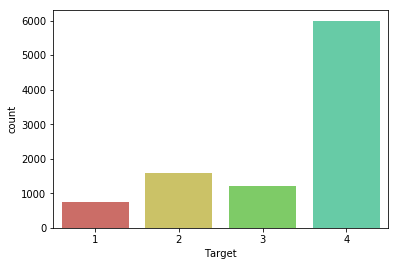

In [88]:
#See the distribution of poverty scores
sns.countplot(train.Target)

In [89]:
ntrain = train.shape[0]
data = pd.concat((train.drop('Target', axis = 1), test)).reset_index(drop = True)
data = data.drop('Id', axis = 1)

In [90]:
data.shape

(33413, 141)

Text(0.5,1,'Percent missing data by feature')

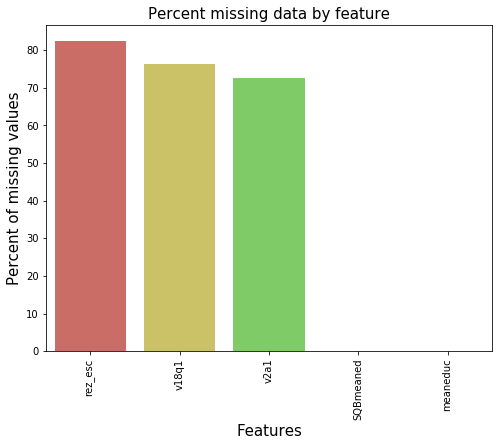

In [91]:
#Check to see missing values
#data.isna().sum().sort_values(ascending = False)[:35]
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y = data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

It looks like we only have 5 features with missing values. These features are defined in the data description as follows:

**rez_esc** - Years behind in school:
The Kaggle Discussions give us some insights that this is only defined for children from the age of 7-19. So for anyone not in this age range it will be set to zero. The rest will be imputed.

**v18q1** - Number of tablets household owns:
This value is missing if the number of tablets owned by the household is equal to zero. So we will replace all of these missing values with zero.

**v2a1** - Monthly rent payment:
There is no clear answer to why these are missing. We will have to look at the data to see if we can find something.

**SQBmeaned** - Square of the mean years of education of adults (>=18) in the household:
We are missing so little that we will just impute these.

**meaneduc** - Average years of education for adults:
We are missing so little that we will just impute these.

In [92]:
# The easy one. Number of tablets
data.v18q1 = data.v18q1.fillna(0)

In [93]:
#To understand rent we are going to look at other variables that go along with it.
#For example, we are going to look at home ownership
ownership = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']
ownership_data = data.loc[data['v2a1'].isnull(), ownership].sum()
ownership_data = ownership_data.reset_index()

([<matplotlib.axis.XTick at 0x1ee029b3da0>,
 <a list of 5 Text xticklabel objects>)

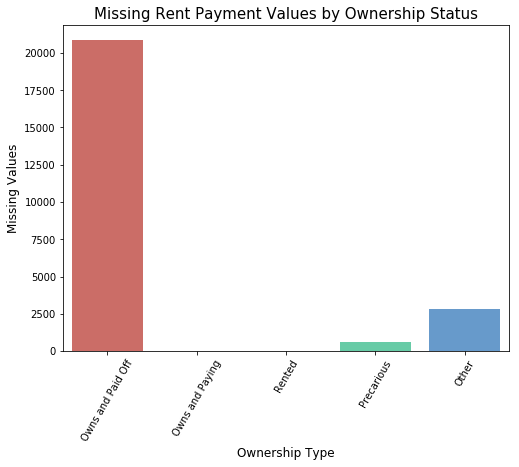

In [94]:
f, ax = plt.subplots(figsize=(8, 6))
plot = sns.barplot(x = 'index', y = 0 , data = ownership_data)
plt.xlabel('Ownership Type', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.title('Missing Rent Payment Values by Ownership Status', fontsize=15)
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)

In [95]:
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,43,100,1849,1,100,0,1.000000,0.00,100.000000,1849
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.00,144.000000,4489
2,0.0,0,8,0,1,1,0,0.0,0,0,...,92,121,8464,1,0,0,0.250000,64.00,121.000000,8464
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.00,121.000000,289
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.00,121.000000,1369
5,180000.0,0,5,0,1,1,1,1.0,0,2,...,38,121,1444,16,121,4,1.777778,1.00,121.000000,1444
6,180000.0,0,5,0,1,1,1,1.0,0,2,...,8,4,64,16,121,4,1.777778,1.00,121.000000,64
7,130000.0,1,2,0,1,1,0,0.0,0,1,...,7,0,49,16,81,4,16.000000,1.00,100.000000,49
8,130000.0,1,2,0,1,1,0,0.0,0,1,...,30,81,900,16,81,4,16.000000,1.00,100.000000,900
9,130000.0,1,2,0,1,1,0,0.0,0,1,...,28,121,784,16,81,4,16.000000,1.00,100.000000,784
